In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('heart (2).csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [5]:
data.duplicated().any()

True

In [6]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.shape

(302, 14)

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


EDA

In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


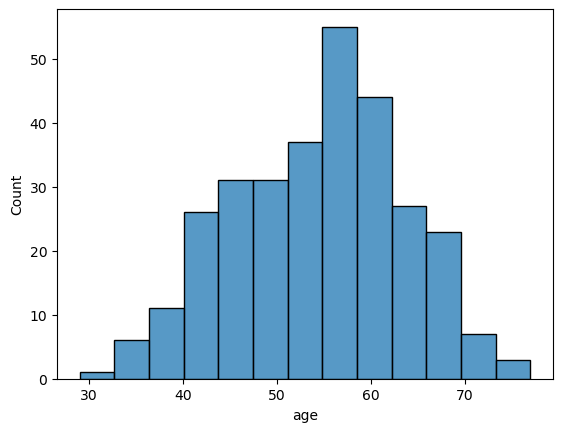

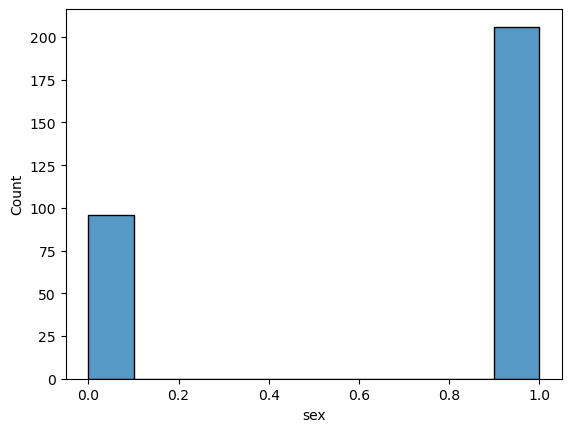

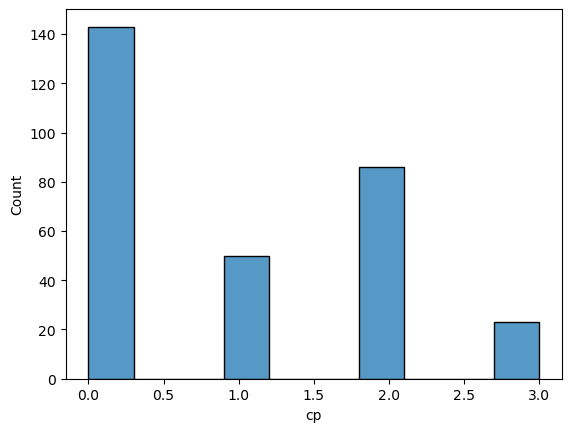

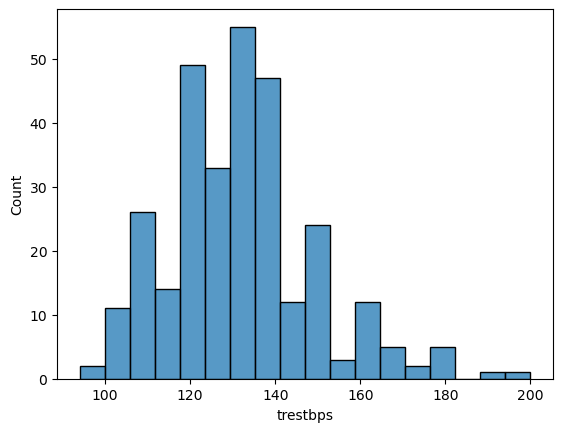

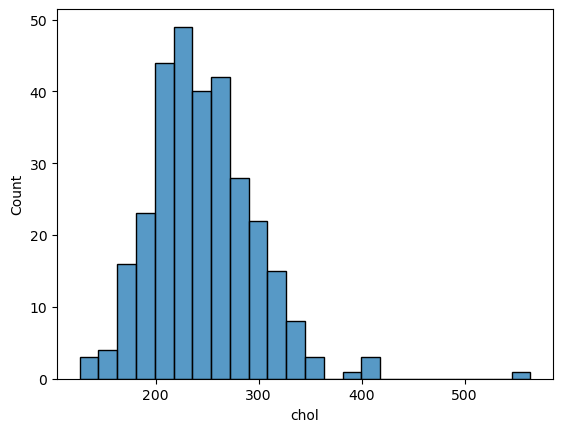

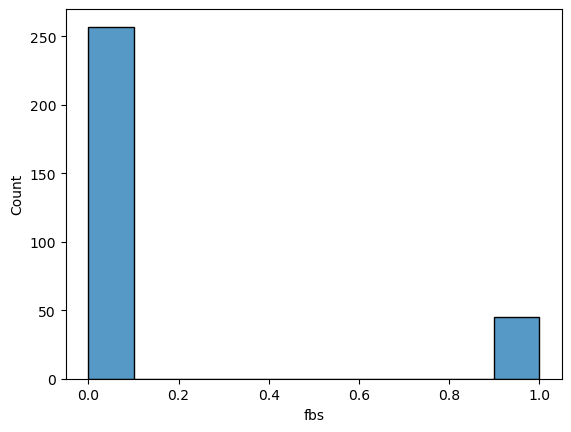

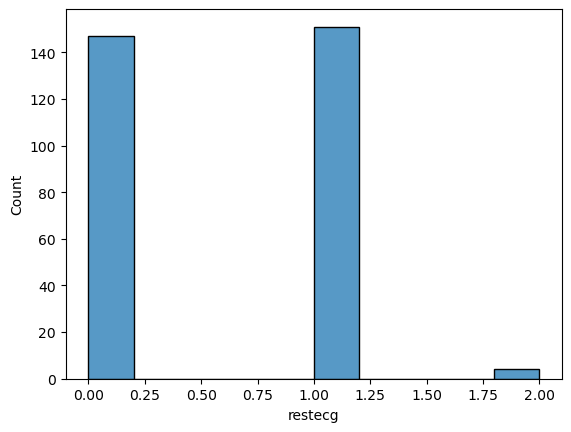

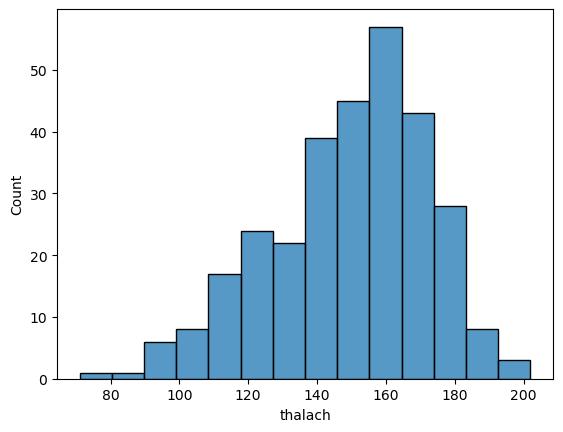

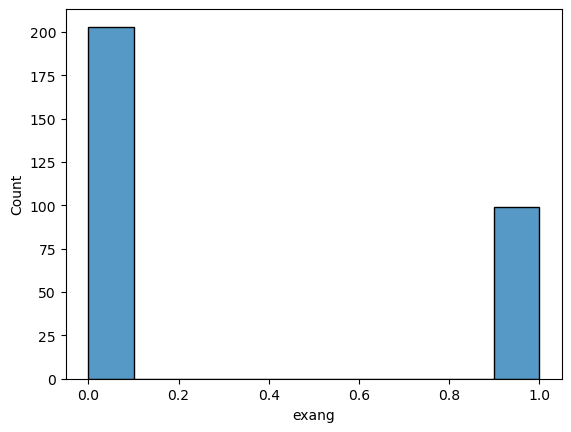

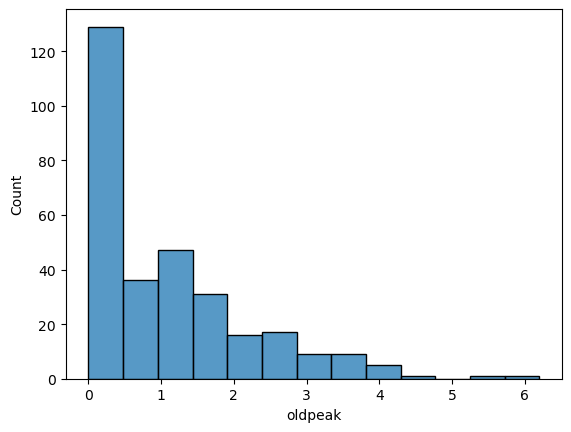

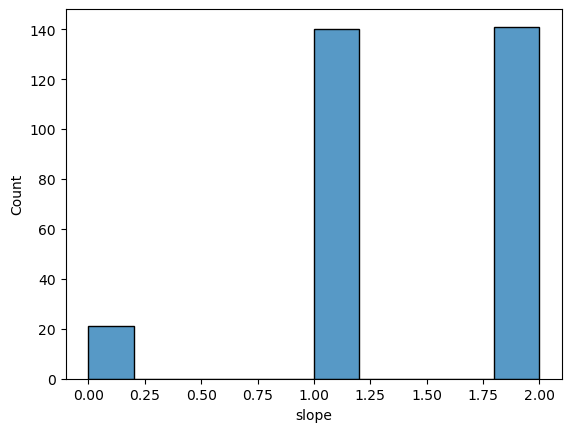

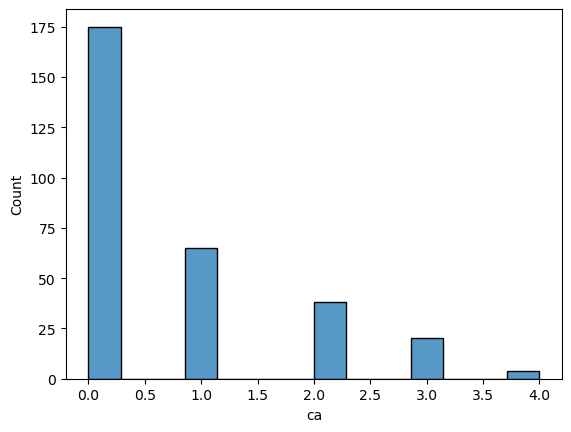

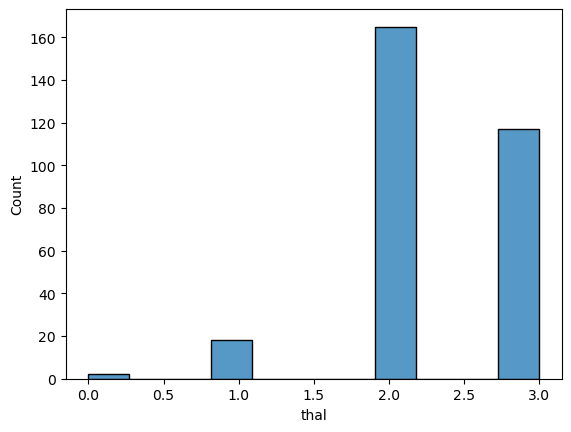

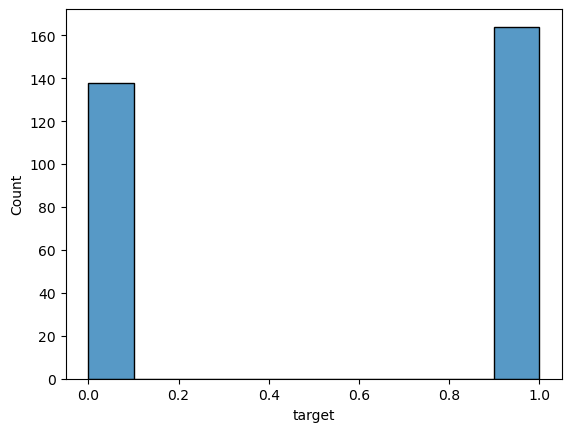

In [14]:
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data,x=i)
    plt.show()

<Axes: xlabel='target', ylabel='count'>

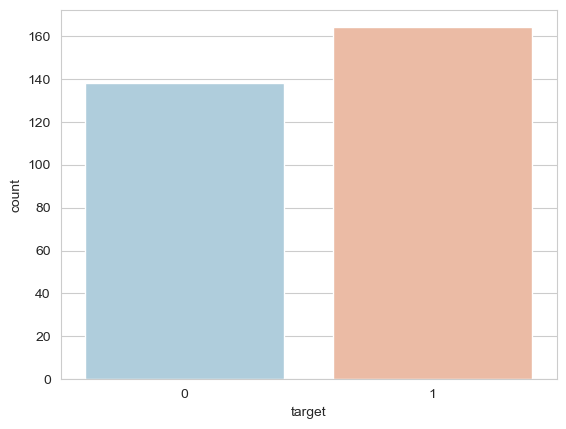

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

Data Preprocessing

In [16]:
categorical_val=[]
numerical_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        categorical_val.append(column)
    else:
        numerical_val.append(column)

In [17]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
numerical_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [19]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [20]:
categorical_val.remove('sex')
categorical_val.remove('target')
# data=pd.get_dummies(data,columns=categorical_val,drop_first=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [21]:
data=data.astype(int)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0,2,0,2,0


In [22]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
data[numerical_val]=st.fit_transform(data[numerical_val])

In [23]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,0.216620,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,2.085738,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.151179,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.717939,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.216620,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,2,-0.661712,-0.687083,0,0,-1.511859,0,0.216620,1,0,2,1
733,-1.153610,0,2,-1.346085,-2.041893,0,1,1.112172,0,-0.717939,1,0,2,1
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.717939,2,1,3,0
843,0.506972,1,3,1.619532,0.512893,0,0,-1.074521,0,-0.717939,2,0,2,0


In [24]:
X=data.drop('target',axis=1)

In [25]:
y=data['target']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_predi=lr.predict(X_test)
accuracy_score(y_test,y_predi)

0.8032786885245902

Support Vector Machine(SVM)

In [29]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)
y_predi1=svm.predict(X_test)
accuracy_score(y_test,y_predi1)

0.8688524590163934

KNN Algorithm

In [30]:
from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,8):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,y,cv=6)
    knn_scores.append(score.mean())


Text(0.5, 1.0, 'K Neighbors Classifier scaores for differnt K Values')

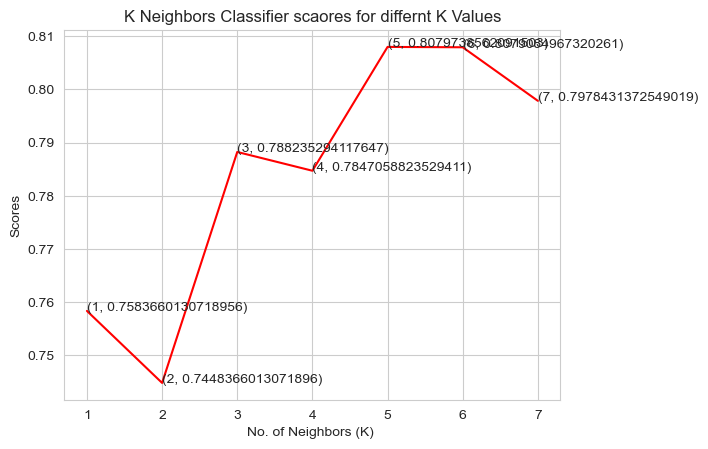

In [31]:
plt.plot([k for k in range(1,8)],knn_scores,color='red')
for i in range(1,8):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,8)])
plt.xlabel('No. of Neighbors (K) ')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scaores for differnt K Values')

In [32]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predi2=knn.predict(X_test)
accuracy_score(y_test,y_predi2)

0.7704918032786885

Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_predi3 = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_predi3,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_predi3 = dt.predict(X_test)
accuracy_score(y_test,y_predi3)

0.7868852459016393

Random forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy_rf = 0

for x in range(8):
    rfc = RandomForestClassifier(random_state=x)
    rfc.fit(X_train, y_train)
    y_predi4= rfc.predict(X_test)
    current_accuracy = round(accuracy_score(y_test, y_predi4) * 100, 2)
    if current_accuracy > max_accuracy_rf:
        max_accuracy_rf = current_accuracy
        best_x_acc= x

rfc = RandomForestClassifier(random_state=best_x_acc)
rfc.fit(X_train, y_train)
y_predi4= rfc.predict(X_test)
accuracy_score(y_test,y_predi4)

0.8688524590163934

In [35]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                        'ACC':[accuracy_score(y_test,y_predi),accuracy_score(y_test,y_predi1),accuracy_score(y_test,y_predi2),accuracy_score(y_test,y_predi3),accuracy_score(y_test,y_predi4)]})

In [36]:
final_data

,Models,ACC
0,LR,0.803279
1,SVM,0.868852
2,KNN,0.770492
3,DT,0.786885
4,RF,0.868852


<Axes: xlabel='Models', ylabel='ACC'>

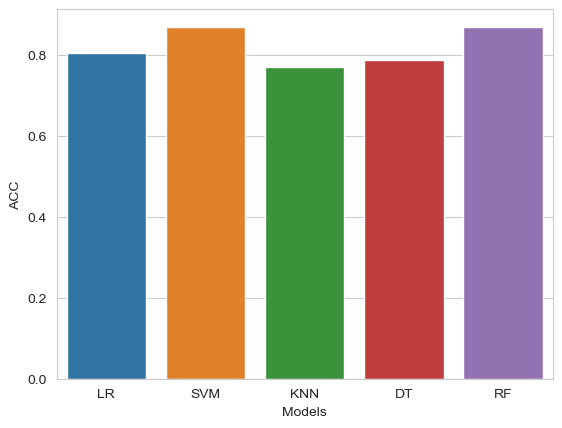

In [37]:
sns.barplot(data=final_data,x='Models', y='ACC')

Train the model on entire dataset

In [38]:
X=data.drop('target',axis=1)
y=data['target']

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

Prediction on New Data

In [40]:
import pandas as pd

In [41]:
new_data=pd.DataFrame({'age':90,'sex':1,'cp':5,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':190,'exang':0,'oldpeak':1.0,'slope':2,'ca':1,'thal':2},index=[0])

In [42]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,90,1,5,125,212,0,1,190,0,1.0,2,1,2


In [43]:
ot=rf.predict(new_data)
if ot[0]==0:
    print('No,it is not a heart Disease')
else:
    print('Yes,it is a heart disease')

No,it is not a heart Disease
